In [1]:
import sys
sys.path.append('..')

In [2]:
from config_simulation import (
    algorithms,
    simulation_linear_regression,
    simulation_logistic_regression,
    simulation_geometric_median,
    simulation_spherical_distribution,
    simulation_p_means,
    eval_covtype,
)

SGD = algorithms.SGD
WASGD = algorithms.WASGD
SNARiccati = algorithms.SNARiccati
WASNARiccati = algorithms.WASNARiccati
USNA = algorithms.USNA
UWASNA = algorithms.UWASNA
SNA = algorithms.SNA
WASNA = algorithms.WASNA


N = 20
n = 10_000

optimizer_list = [
    WASGD(),
    SNARiccati(),
    WASNARiccati(),
    # WASNARiccati(compute_hessian_theta_avg=False),
    USNA(c_nu=5.0),
    UWASNA(c_nu = 5.0),
    # UWASNA(c_nu = 5.0, compute_hessian_theta_avg=False),
    # UWASNA(c_nu = 5.0, use_hessian_avg=False),
    # UWASNA(c_nu = 5.0, compute_hessian_theta_avg=False, use_hessian_avg=False),
    # UWASNA(c_nu = 5.0, generate_Z="normal"),
]

import copy
optimizer_list_without_riccati = copy.deepcopy(optimizer_list)
optimizer_list_without_riccati[1] = SNA()
optimizer_list_without_riccati[2] = WASNA()
# optimizer_list_without_riccati[3] = WASNA(compute_hessian_theta_avg=False)

In [3]:
# N = 2
# n = 1000

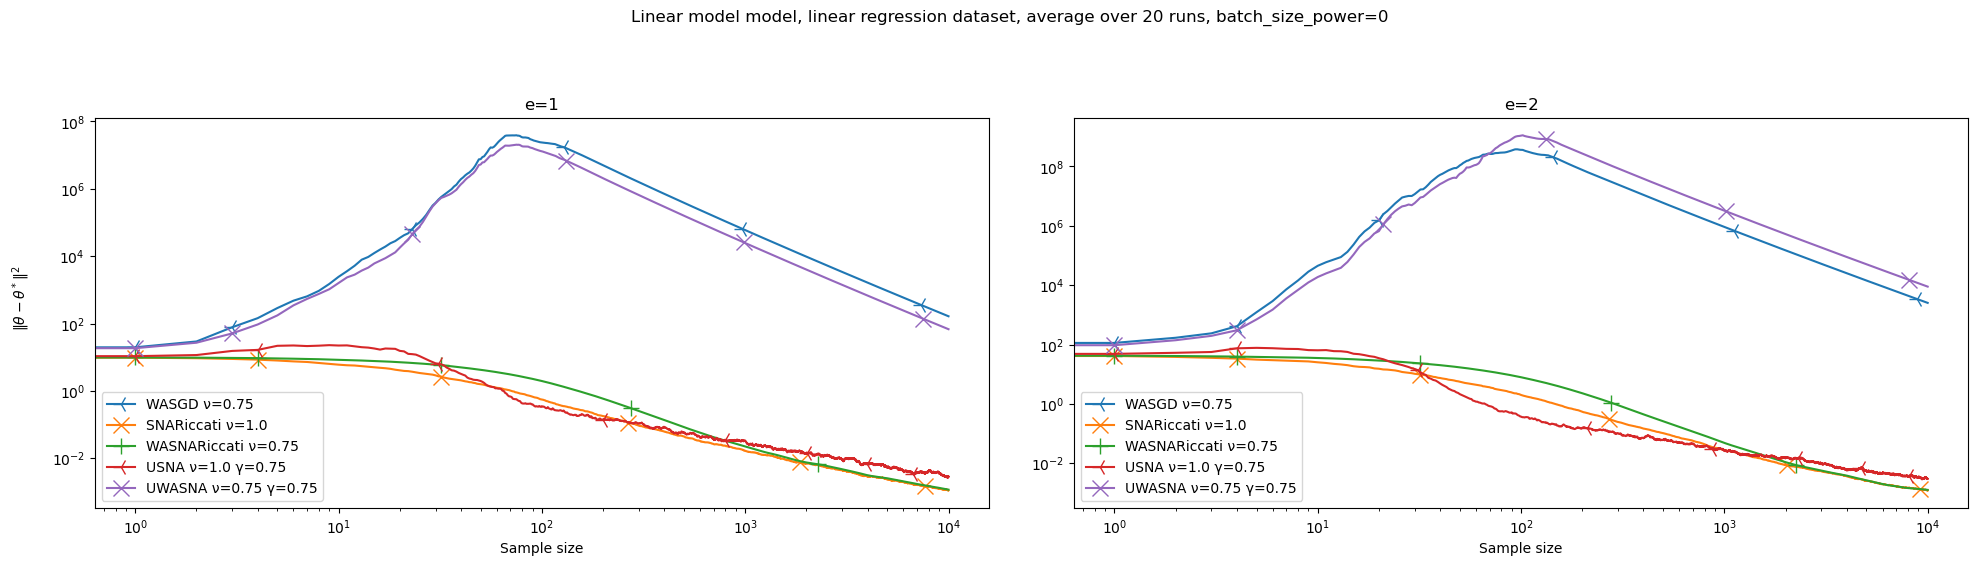

In [4]:
simulation = simulation_linear_regression(optimizer_list=optimizer_list)
simulation.run_multiple_track_errors(N=N, n=n)

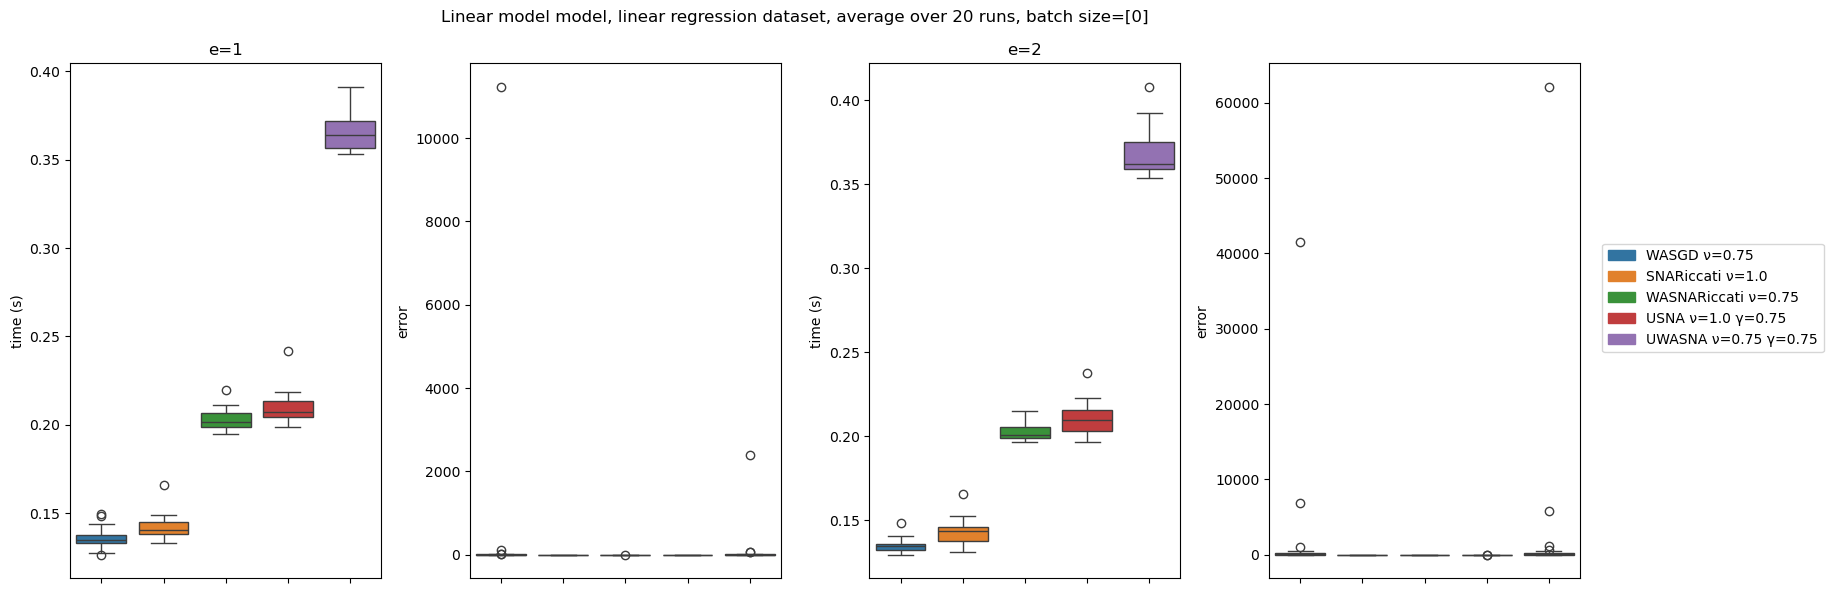

In [5]:
simulation.run_multiple_track_time(N=N, n=n)

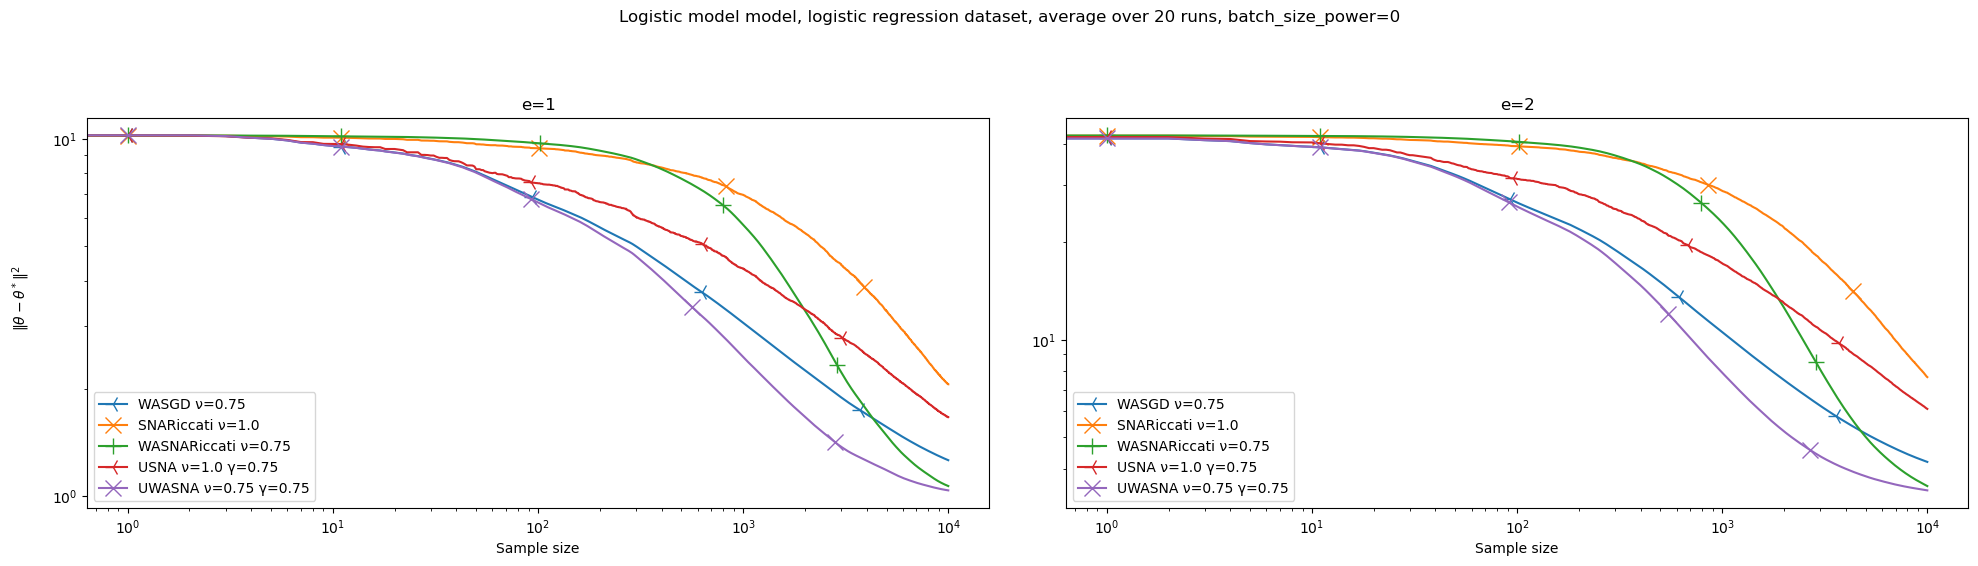

In [6]:
simulation = simulation_logistic_regression(optimizer_list=optimizer_list)
simulation.run_multiple_track_errors(N=N, n=n)

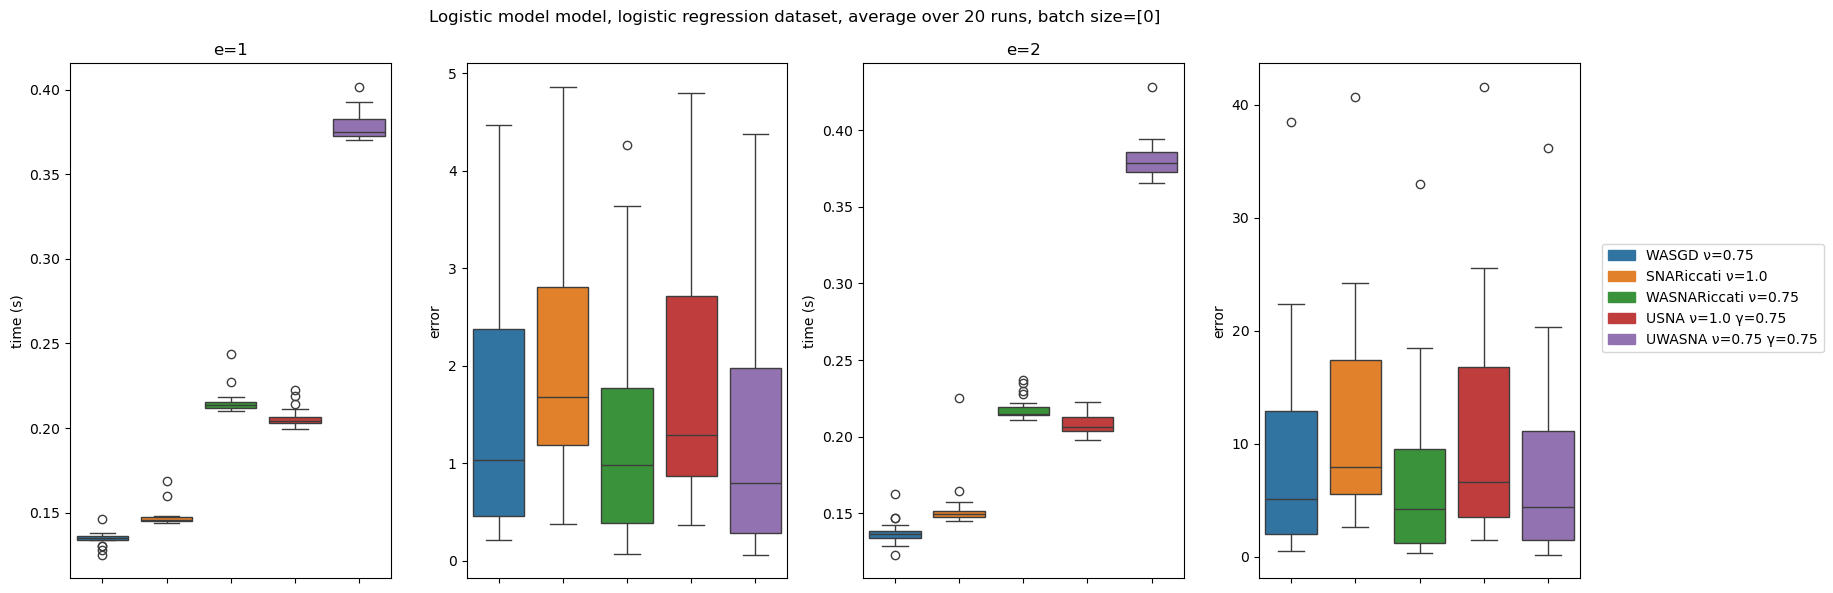

In [7]:
simulation.run_multiple_track_time(N=N, n=n)

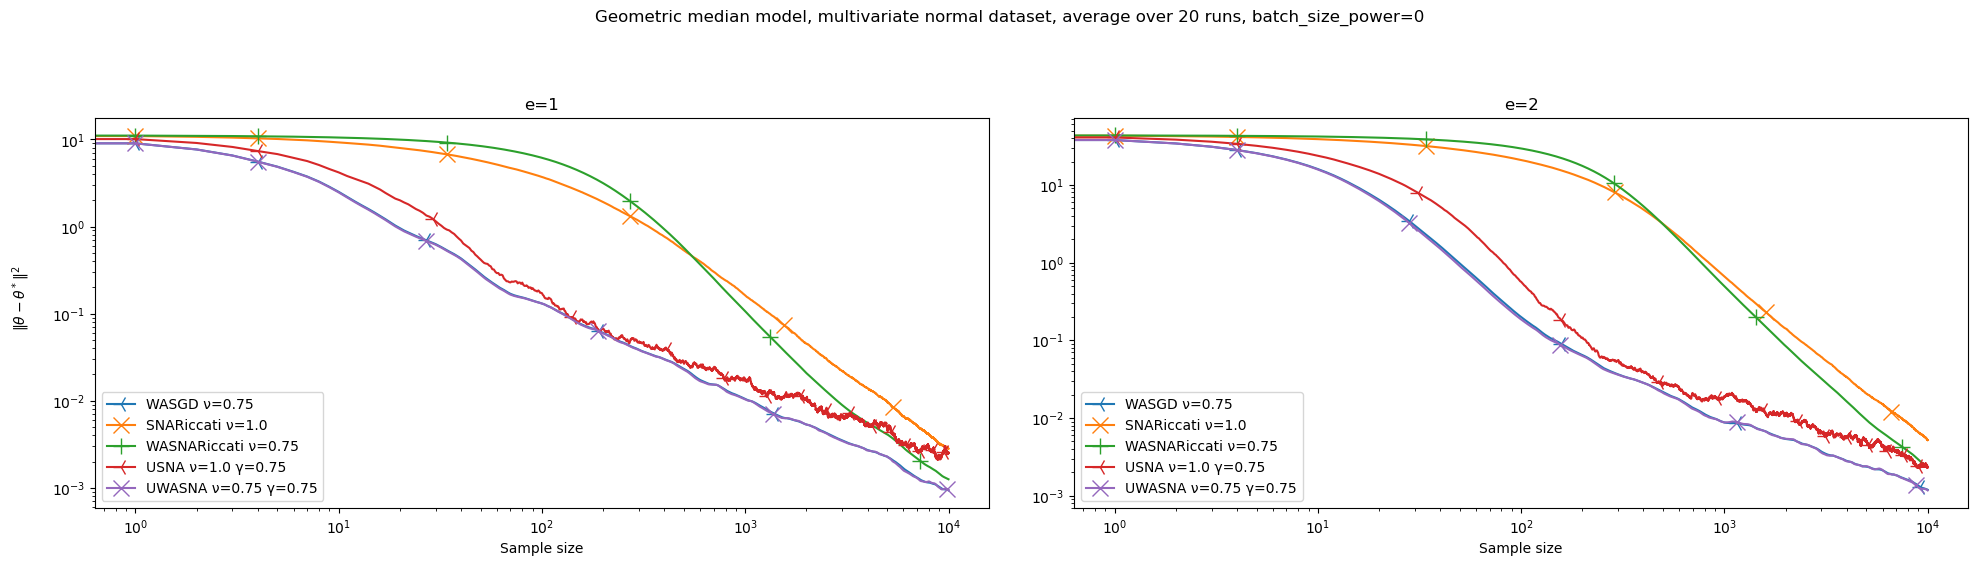

In [8]:
simulation = simulation_geometric_median(optimizer_list=optimizer_list)
simulation.run_multiple_track_errors(N=20, n=n)

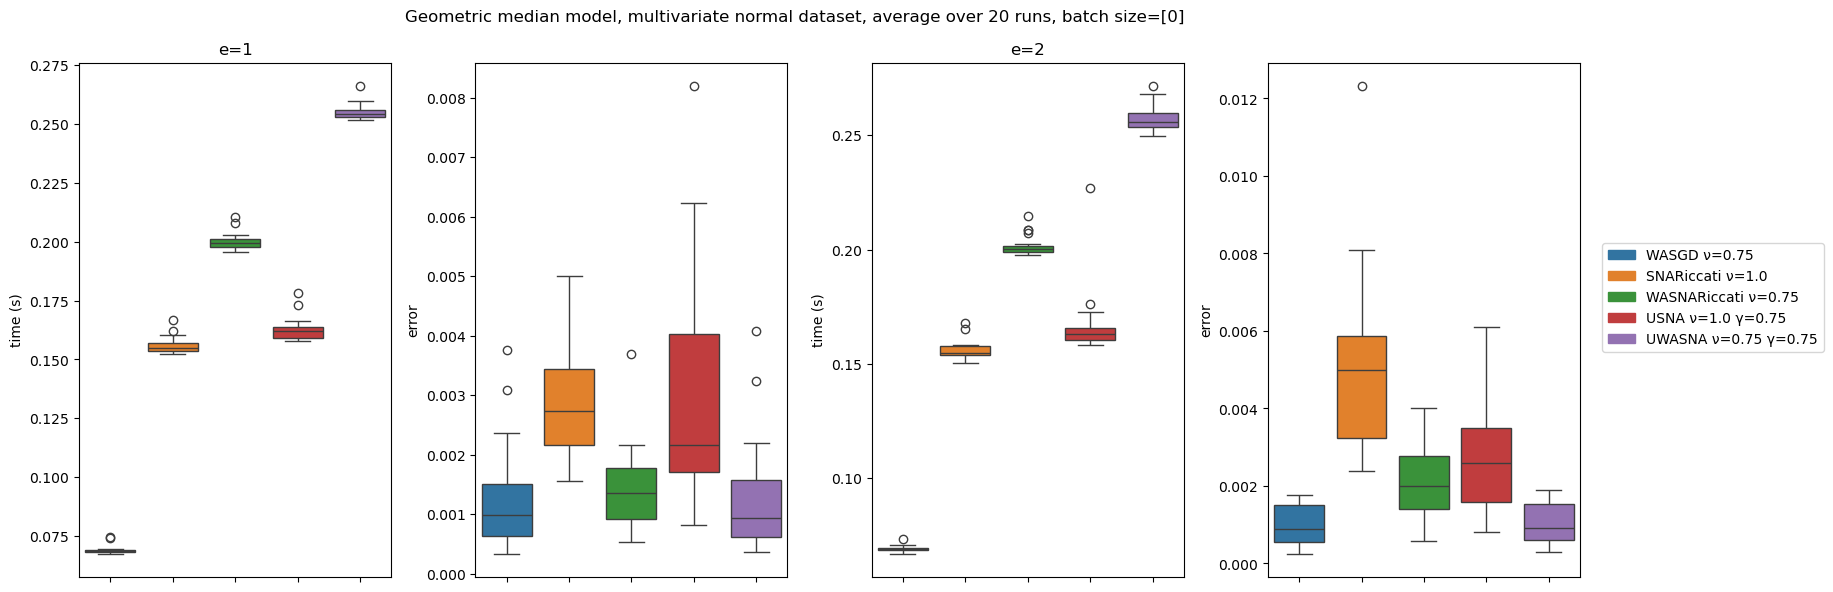

In [9]:
simulation.run_multiple_track_time(N=N, n=n)

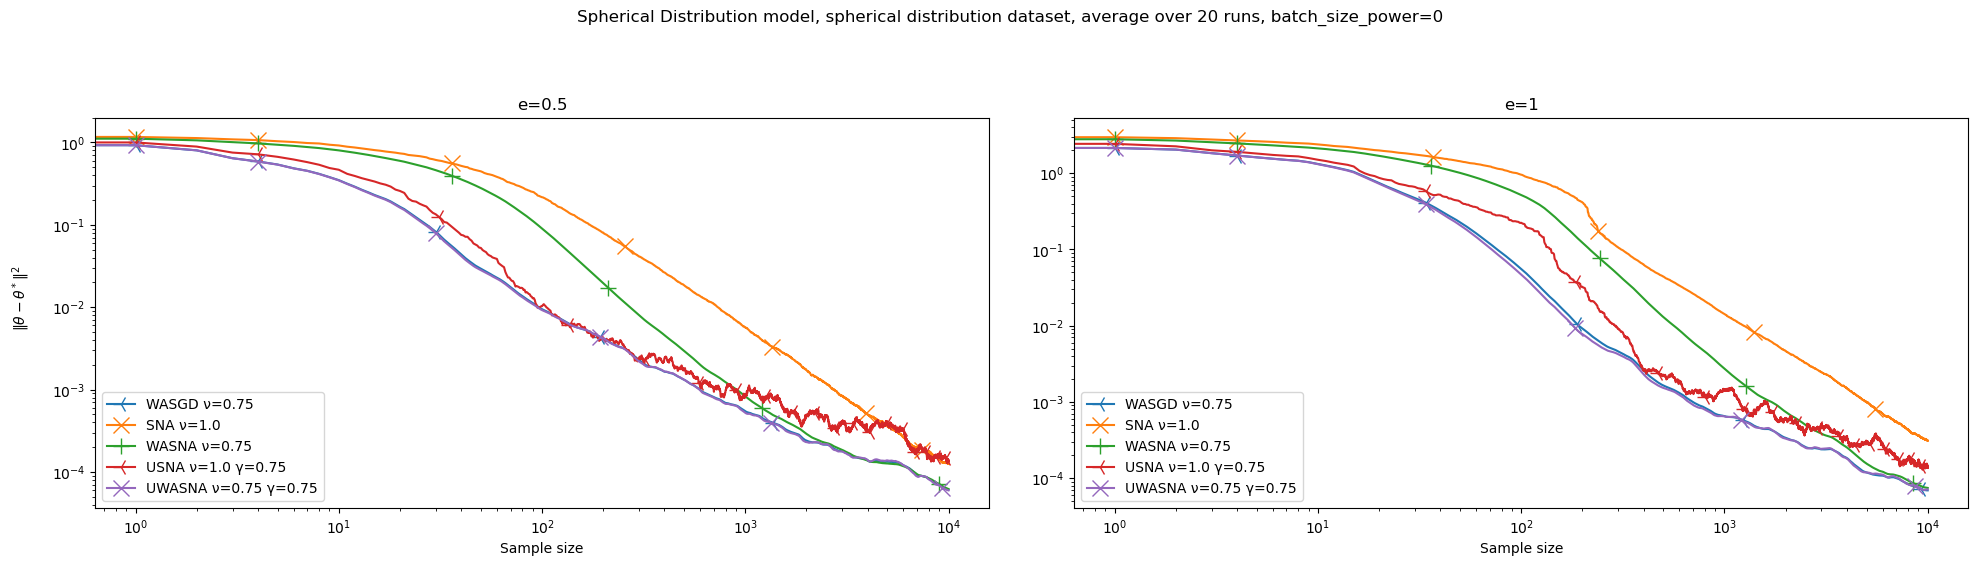

In [10]:
simulation = simulation_spherical_distribution(
    optimizer_list=optimizer_list_without_riccati
)
simulation.run_multiple_track_errors(N=N, n=n)

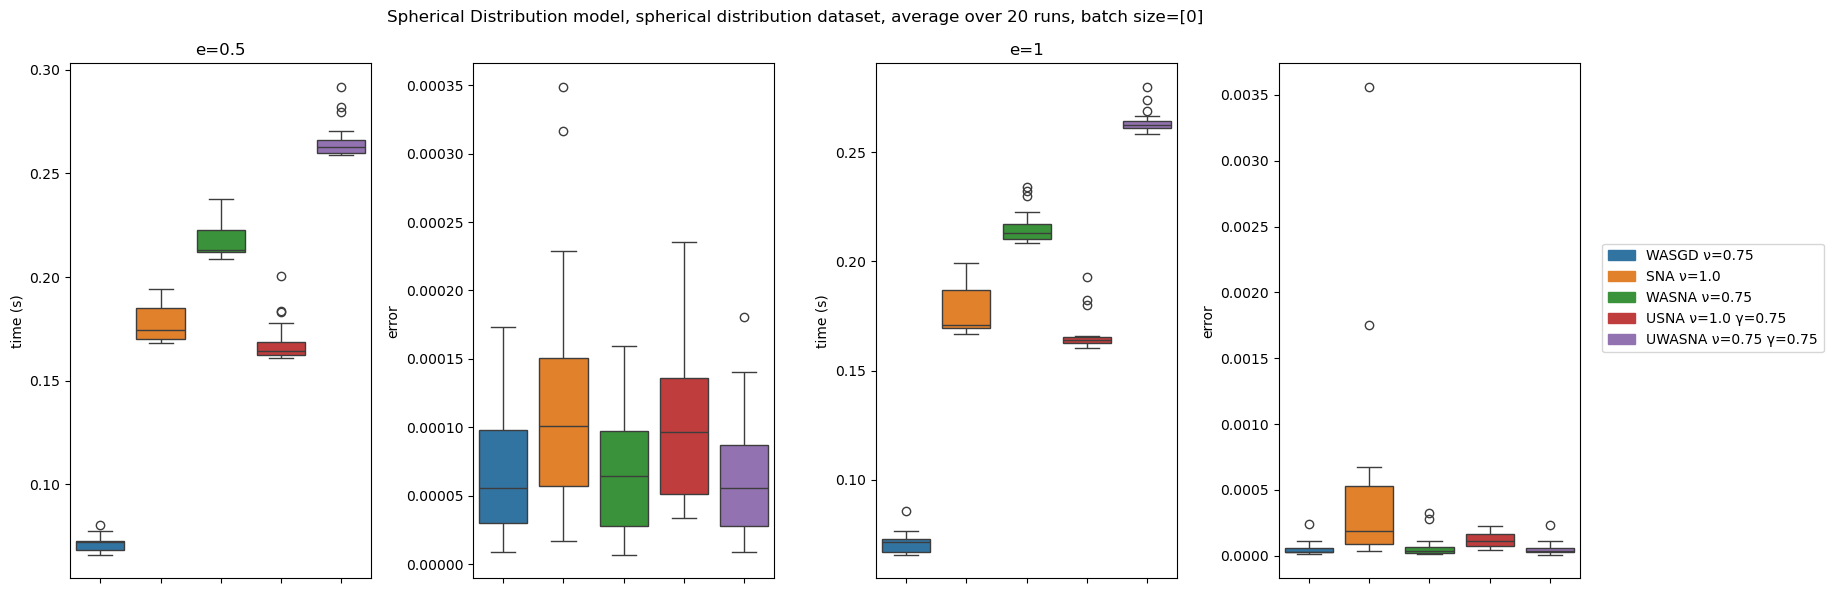

In [11]:
simulation.run_multiple_track_time(N=N, n=n)

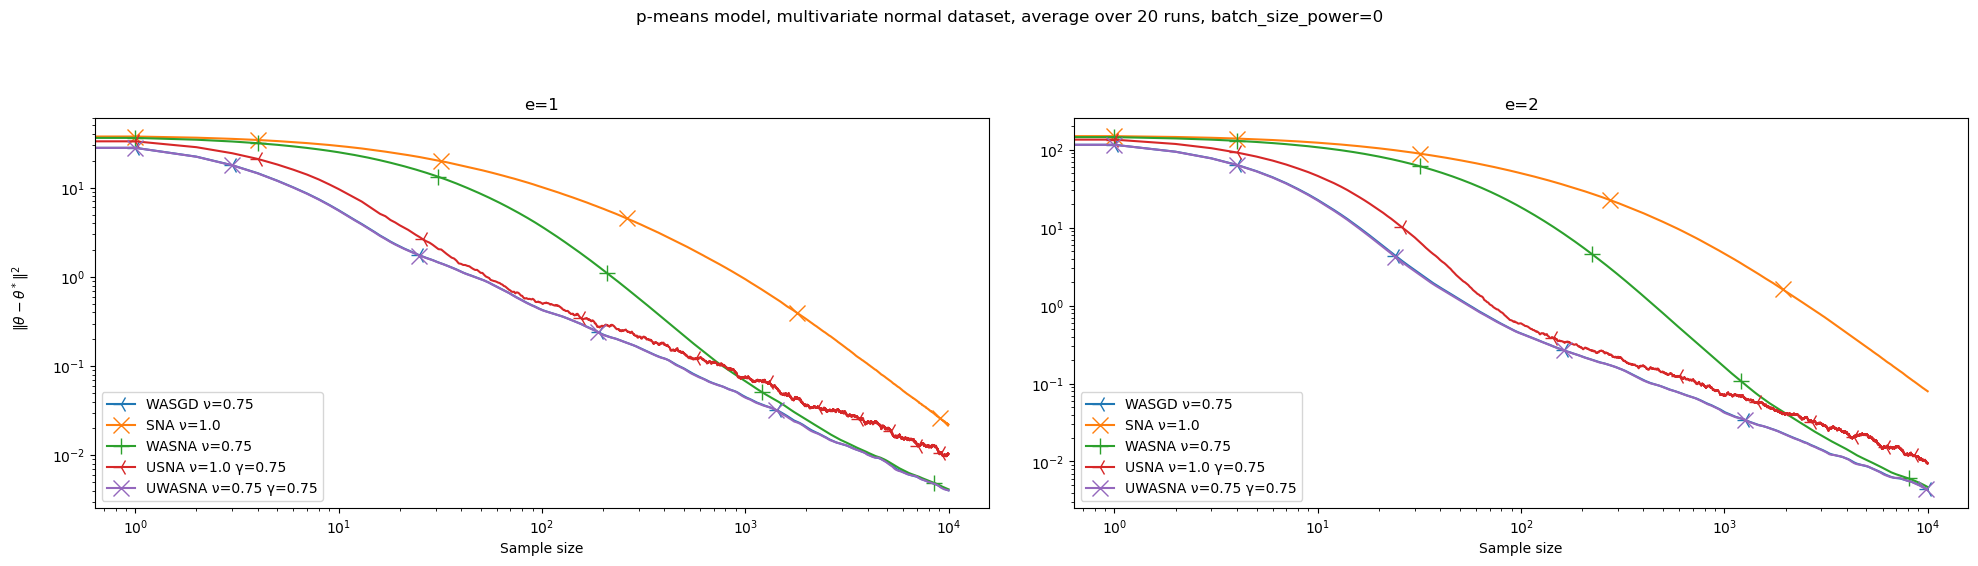

In [12]:
simulation = simulation_p_means(optimizer_list=optimizer_list_without_riccati)
simulation.run_multiple_track_errors(N=N, n=n)

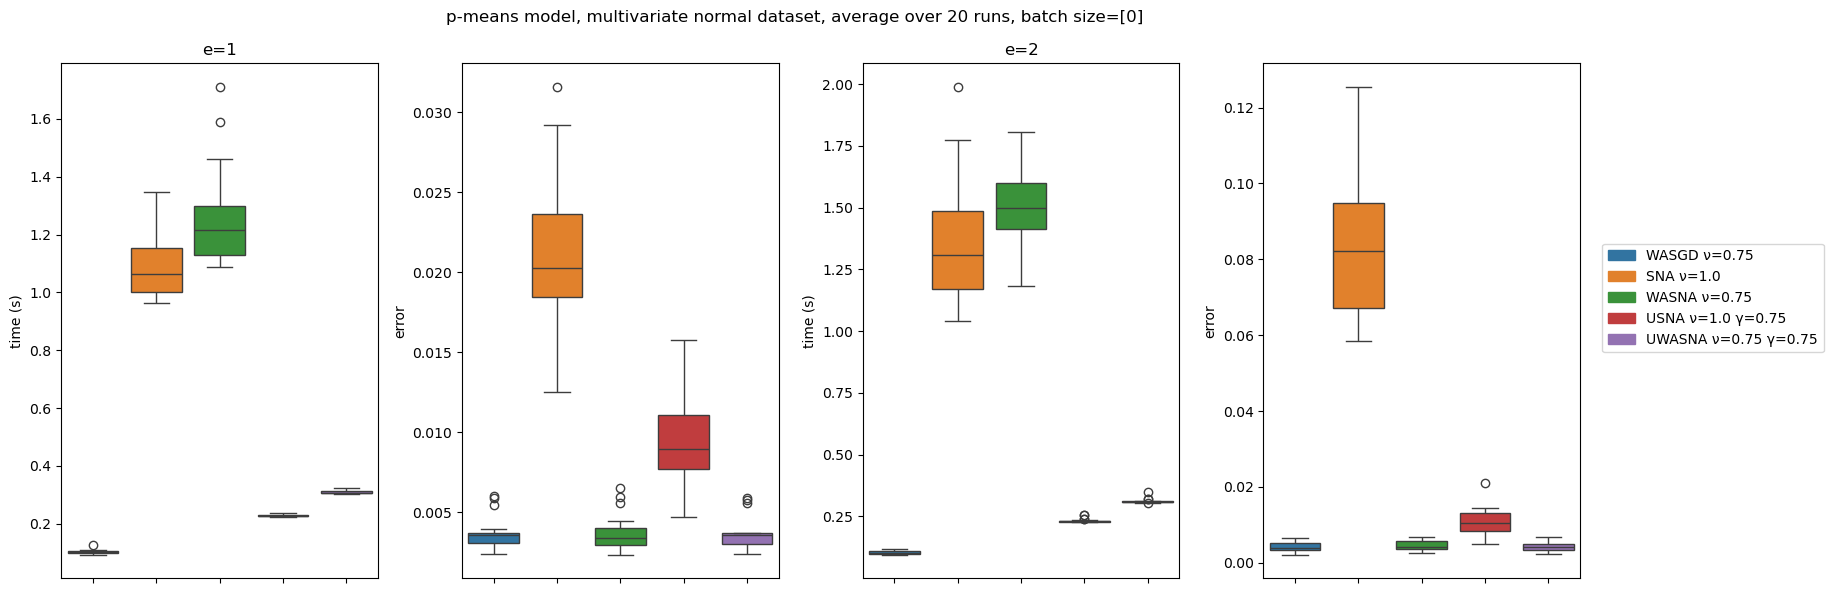

In [13]:
simulation.run_multiple_track_time(N=N, n=n)

In [14]:
eval = eval_covtype(optimizer_list=[USNA()])
_, _ = eval.run_track_time()

AttributeError: 'Simulation' object has no attribute 'run_eval_time'